# 1. 데이터 파악 및 EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/금융빅데이터분석가/신용카드 연체 예측

[Errno 2] No such file or directory: '/content/drive/MyDrive/금융빅데이터분석가/신용카드 연체 예측'
/content


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/신용카드 연체 예측/yj_final_df.csv")
df.head()

,Unnamed: 0,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,chi-fam,occyp_type_le,house_type_le,family_type_le,income_type_le,edu_type_le,Age,career_year,career_start_age,card_count,credit_change_count
0,0,17940,1,1,0,0,382500.0,Working,Higher education,Civil marriage,House / apartment,11153,1281,1,1,0,Accountants,2.0,60.0,2.0,-2.0,0,1,0,4,2,30,4.0,26.0,1,1
1,1,20390,1,0,1,1,67500.0,Working,Secondary / secondary special,Married,With parents,15964,385,0,0,0,Sales staff,3.0,60.0,2.0,-2.0,15,5,1,4,0,43,2.0,41.0,1,1
2,2,24612,1,0,1,3,180000.0,State servant,Higher education,Married,House / apartment,11627,1449,1,0,0,NaN,5.0,60.0,2.0,-2.0,12,1,1,2,2,31,4.0,27.0,1,1
3,3,17577,0,1,0,3,360000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15262,1674,0,0,0,Managers,5.0,60.0,2.0,-2.0,10,1,1,0,0,41,5.0,36.0,1,1
4,4,18174,1,0,0,1,225000.0,Working,Secondary / secondary special,Separated,House / apartment,11509,3506,0,0,0,Laborers,2.0,60.0,2.0,-1.0,8,1,2,4,0,31,10.0,21.0,1,1


In [ ]:
df.drop(columns=['Unnamed: 0','index','income_type','edu_type','family_type','house_type','occyp_type','DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace=True)

In [ ]:
df.head()

,gender,car,reality,child_num,income_total,work_phone,phone,email,family_size,begin_month,credit,chi-fam,occyp_type_le,house_type_le,family_type_le,income_type_le,edu_type_le,Age,career_year,career_start_age,card_count,credit_change_count
0,1,1,0,0,382500.0,1,1,0,2.0,60.0,2.0,-2.0,0,1,0,4,2,30,4.0,26.0,1,1
1,1,0,1,1,67500.0,0,0,0,3.0,60.0,2.0,-2.0,15,5,1,4,0,43,2.0,41.0,1,1
2,1,0,1,3,180000.0,1,0,0,5.0,60.0,2.0,-2.0,12,1,1,2,2,31,4.0,27.0,1,1
3,0,1,0,3,360000.0,0,0,0,5.0,60.0,2.0,-2.0,10,1,1,0,0,41,5.0,36.0,1,1
4,1,0,0,1,225000.0,0,0,0,2.0,60.0,2.0,-1.0,8,1,2,4,0,31,10.0,21.0,1,1


In [ ]:
df.shape

(8759, 22)

# 2. 전처리

### 상관관계 파악하기

In [ ]:
df.corr()

,gender,car,reality,child_num,income_total,work_phone,phone,email,family_size,begin_month,credit,chi-fam,occyp_type_le,house_type_le,family_type_le,income_type_le,edu_type_le,Age,career_year,career_start_age,card_count,credit_change_count
gender,1.000000,-0.358452,0.057792,-0.051657,-0.196636,-0.057810,0.023410,-0.009514,-0.080298,-0.007373,-0.003459,0.082786,0.107075,-0.060870,0.083166,-0.088824,0.016986,0.175153,0.023753,0.139886,0.039499,0.011417
car,-0.358452,1.000000,-0.008754,0.082645,0.221418,0.033716,0.001182,0.020135,0.131849,0.007799,0.001186,-0.139585,-0.088185,0.001943,-0.122860,0.041963,0.095344,-0.125549,0.018375,-0.117239,0.028835,0.023191
reality,0.057792,-0.008754,1.000000,0.004288,0.027685,-0.179700,-0.057153,0.056997,0.010268,-0.004293,0.013658,-0.014316,0.020664,-0.182844,-0.007016,-0.041356,-0.004993,0.132902,-0.024176,0.126370,0.005995,-0.007775
child_num,-0.051657,0.082645,0.004288,1.000000,0.028051,0.052035,-0.025482,0.006504,0.890915,-0.004492,-0.006157,-0.149291,-0.078318,0.016471,-0.146521,0.104054,0.027622,-0.316556,0.048067,-0.296437,0.007283,-0.000714
income_total,-0.196636,0.221418,0.027685,0.028051,1.000000,-0.031548,0.018846,0.093928,0.025275,-0.006601,-0.008251,-0.004906,-0.062019,-0.005373,-0.017107,-0.076451,0.242535,-0.062350,0.093219,-0.098533,0.063669,0.034017
work_phone,-0.057810,0.033716,-0.179700,0.052035,-0.031548,1.000000,0.286946,-0.038403,0.062115,-0.002596,-0.017627,-0.041954,-0.081688,0.035690,-0.053861,0.146439,0.011133,-0.180709,0.115229,-0.211305,0.018762,0.023949
phone,0.023410,0.001182,-0.057153,-0.025482,0.018846,0.286946,1.000000,0.007023,-0.013278,-0.000304,-0.010653,-0.016589,-0.001490,-0.026868,-0.011695,-0.008366,0.043402,0.047196,0.039804,0.021681,0.010194,0.009048
email,-0.009514,0.020135,0.056997,0.006504,0.093928,-0.038403,0.007023,1.000000,0.002090,-0.008936,0.006638,0.007192,-0.029602,0.021159,-0.002757,-0.021378,0.108483,-0.107384,-0.006632,-0.089564,0.008279,0.008660
family_size,-0.080298,0.131849,0.010268,0.890915,0.025275,0.062115,-0.013278,0.002090,1.000000,0.002674,-0.002698,-0.581944,-0.074367,-0.014955,-0.529355,0.095467,0.020334,-0.270187,0.063607,-0.263838,0.017448,0.006747
begin_month,-0.007373,0.007799,-0.004293,-0.004492,-0.006601,-0.002596,-0.000304,-0.008936,0.002674,1.000000,0.222660,-0.014125,-0.000694,-0.045237,-0.010775,-0.013671,-0.005909,0.062374,0.030604,0.039200,-0.385091,-0.342250


In [ ]:
df.corr(method='pearson')['credit'].sort_values(ascending=False)

credit                 1.000000
begin_month            0.222660
Age                    0.024764
career_year            0.015114
career_start_age       0.014142
reality                0.013658
email                  0.006638
income_type_le         0.002480
car                    0.001186
occyp_type_le         -0.002162
family_size           -0.002698
gender                -0.003459
family_type_le        -0.005073
chi-fam               -0.005360
child_num             -0.006157
income_total          -0.008251
phone                 -0.010653
house_type_le         -0.011262
work_phone            -0.017627
edu_type_le           -0.024383
card_count            -0.148018
credit_change_count   -0.343037
Name: credit, dtype: float64

# 모델링
## ANN - 이진 분류

In [ ]:
df.shape

(8759, 22)

In [ ]:
df.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'work_phone',
       'phone', 'email', 'family_size', 'begin_month', 'credit', 'chi-fam',
       'occyp_type_le', 'house_type_le', 'family_type_le', 'income_type_le',
       'edu_type_le', 'Age', 'career_year', 'career_start_age', 'card_count',
       'credit_change_count'],
      dtype='object')

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.preprocessing import StandardScaler

tf.random.set_seed(0)
X = df.drop(columns=['credit'], axis=1)
y = df['credit']
y = y.apply(lambda x: 1 if x==2 else x)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6569, 21) (2190, 21)
(6569,) (2190,)


In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5632      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 38,657
Trainable params: 38,657
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=False)
mc = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, 
                    batch_size=10, 
                    validation_split=0.1, 
                    epochs=500, 
                    callbacks=[es, mc])

Epoch 1/500
592/592 [==============================] - 6s 5ms/step - loss: 0.3786 - accuracy: 0.8758 - val_loss: 0.3759 - val_accuracy: 0.8676
Epoch 2/500
592/592 [==============================] - 3s 4ms/step - loss: 0.3613 - accuracy: 0.8767 - val_loss: 0.3698 - val_accuracy: 0.8676
Epoch 3/500
592/592 [==============================] - 2s 4ms/step - loss: 0.3542 - accuracy: 0.8752 - val_loss: 0.3726 - val_accuracy: 0.8676
Epoch 4/500
592/592 [==============================] - 3s 5ms/step - loss: 0.3486 - accuracy: 0.8765 - val_loss: 0.3742 - val_accuracy: 0.8630
Epoch 5/500
592/592 [==============================] - 3s 4ms/step - loss: 0.3421 - accuracy: 0.8786 - val_loss: 0.3823 - val_accuracy: 0.8630
Epoch 6/500
592/592 [==============================] - 3s 4ms/step - loss: 0.3359 - accuracy: 0.8779 - val_loss: 0.3901 - val_accuracy: 0.8661


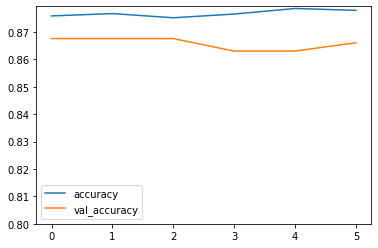

In [ ]:
df_history = pd.DataFrame(history.history)
df_h = df_history.loc[:, ['accuracy', 'val_accuracy']]
df_h.plot()
plt.ylim(0.8,)
plt.show()

min_val_loss: 0.33590489625930786


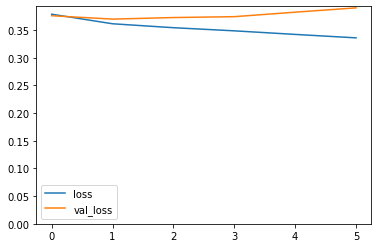

In [ ]:
df_h2 = df_history.loc[:, ['loss', 'val_loss']]
df_h2.plot()
plt.ylim(0,)
print(f"min_val_loss: {df_h2['loss'].min()}")

In [ ]:
score = model.evaluate(X_test, y_test)
print(f'test loss: {score[0]}')
print(f'test accuracy: {score[1]}')

69/69 [==============================] - 0s 3ms/step - loss: 0.4129 - accuracy: 0.8580
test loss: 0.41292187571525574
test accuracy: 0.8579908609390259


In [ ]:
# ANN 모델 정확도
np.round(score[1],4)

0.858

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm_wrapper = LGBMClassifier(n_estimators=400, random_state=0)

In [ ]:
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.401186	valid_0's binary_logloss: 0.401186
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.397663	valid_0's binary_logloss: 0.397663
[3]	valid_0's binary_logloss: 0.394971	valid_0's binary_logloss: 0.394971
[4]	valid_0's binary_logloss: 0.392609	valid_0's binary_logloss: 0.392609
[5]	valid_0's binary_logloss: 0.39024	valid_0's binary_logloss: 0.39024
[6]	valid_0's binary_logloss: 0.38921	valid_0's binary_logloss: 0.38921
[7]	valid_0's binary_logloss: 0.388077	valid_0's binary_logloss: 0.388077
[8]	valid_0's binary_logloss: 0.386474	valid_0's binary_logloss: 0.386474
[9]	valid_0's binary_logloss: 0.386156	valid_0's binary_logloss: 0.386156
[10]	valid_0's binary_logloss: 0.38577	valid_0's binary_logloss: 0.38577
[11]	valid_0's binary_logloss: 0.385234	valid_0's binary_logloss: 0.385234
[12]	valid_0's binary_logloss: 0.384867	valid_0's binary_logloss: 0.384867
[13]	valid_0's binary_logloss: 0.384533	valid_0's bi

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [ ]:
get_clf_eval(y_test, preds)

오차행렬:
 [[   0  307]
 [   0 1883]]

정확도: 0.8598
정밀도: 0.8598
재현율: 1.0000
F1: 0.9246
AUC: 0.5000


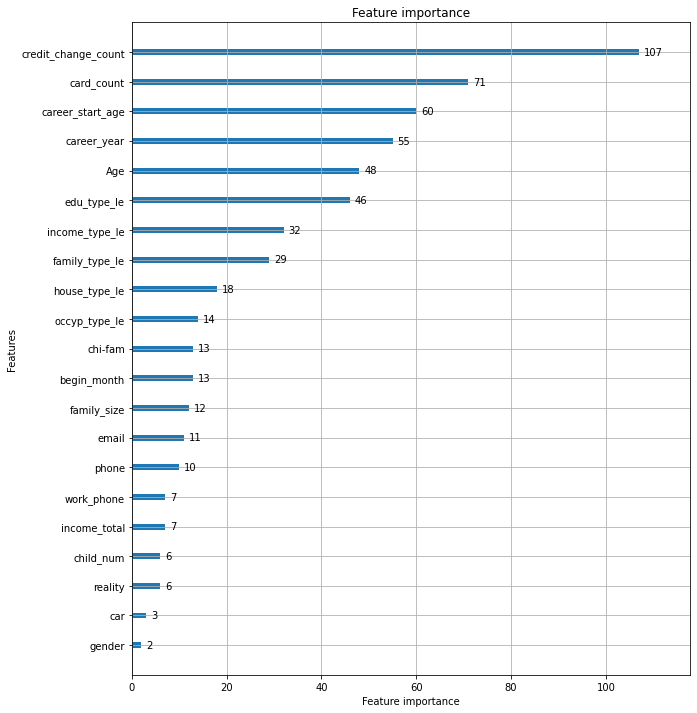

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax).set_yticklabels(X.columns)
plt.show()

In [ ]:
X.head()

,gender,car,reality,child_num,income_total,work_phone,phone,email,family_size,begin_month,chi-fam,occyp_type_le,house_type_le,family_type_le,income_type_le,edu_type_le,Age,career_year,career_start_age,card_count,credit_change_count
0,1,1,0,0,382500.0,1,1,0,2.0,60.0,-2.0,0,1,0,4,2,30,4.0,26.0,1,1
1,1,0,1,1,67500.0,0,0,0,3.0,60.0,-2.0,15,5,1,4,0,43,2.0,41.0,1,1
2,1,0,1,3,180000.0,1,0,0,5.0,60.0,-2.0,12,1,1,2,2,31,4.0,27.0,1,1
3,0,1,0,3,360000.0,0,0,0,5.0,60.0,-2.0,10,1,1,0,0,41,5.0,36.0,1,1
4,1,0,0,1,225000.0,0,0,0,2.0,60.0,-1.0,8,1,2,4,0,31,10.0,21.0,1,1


# Label 바꾸지 않은 데이터 (0,1,2)

## ANN

In [ ]:
df.shape

(8759, 22)

In [ ]:
df.credit.value_counts()

2.0    5238
1.0    2396
0.0    1125
Name: credit, dtype: int64

In [ ]:
df.head()

,gender,car,reality,child_num,income_total,work_phone,phone,email,family_size,begin_month,credit,chi-fam,occyp_type_le,house_type_le,family_type_le,income_type_le,edu_type_le,Age,career_year,career_start_age,card_count,credit_change_count
0,1,1,0,0,382500.0,1,1,0,2.0,60.0,2.0,-2.0,0,1,0,4,2,30,4.0,26.0,1,1
1,1,0,1,1,67500.0,0,0,0,3.0,60.0,2.0,-2.0,15,5,1,4,0,43,2.0,41.0,1,1
2,1,0,1,3,180000.0,1,0,0,5.0,60.0,2.0,-2.0,12,1,1,2,2,31,4.0,27.0,1,1
3,0,1,0,3,360000.0,0,0,0,5.0,60.0,2.0,-2.0,10,1,1,0,0,41,5.0,36.0,1,1
4,1,0,0,1,225000.0,0,0,0,2.0,60.0,2.0,-1.0,8,1,2,4,0,31,10.0,21.0,1,1


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.preprocessing import StandardScaler
tf.random.set_seed(0)

X = df.drop(columns=['credit'], axis=1)
y = df['credit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_dim=X.shape[1]))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               2816      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,137
Trainable params: 11,137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#es = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=False)
#mc = ModelCheckpoint(filepath='best_model2.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train,  
                    validation_split=0.1, 
                    epochs=30, )

Epoch 1/30
185/185 [==============================] - 2s 6ms/step - loss: 0.0000e+00 - accuracy: 0.2803 - val_loss: 0.0000e+00 - val_accuracy: 0.2542
Epoch 2/30
185/185 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2803 - val_loss: 0.0000e+00 - val_accuracy: 0.2542
Epoch 3/30
185/185 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2803 - val_loss: 0.0000e+00 - val_accuracy: 0.2542
Epoch 4/30
185/185 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2803 - val_loss: 0.0000e+00 - val_accuracy: 0.2542
Epoch 5/30
185/185 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2803 - val_loss: 0.0000e+00 - val_accuracy: 0.2542
Epoch 6/30
185/185 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2803 - val_loss: 0.0000e+00 - val_accuracy: 0.2542
Epoch 7/30
185/185 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2

(0.0, 0.28158198595046996)

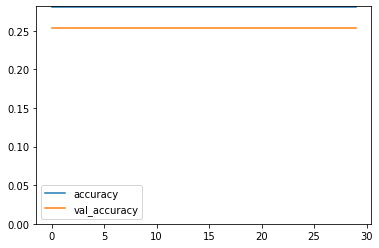

In [ ]:
df_history = pd.DataFrame(history.history)
df_h = df_history.loc[:, ['accuracy', 'val_accuracy']]
df_h.plot()
plt.ylim(0,)

## Catboost

In [ ]:
pip install catboost

     |████████████████████████████████| 76.3 MB 23 kB/s 


In [ ]:
import catboost as cb
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['credit'], axis=1)
y = df['credit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
train_dataset = cb.Pool(X_train,y_train)
test_dataset = cb.Pool(X_test,y_test)

In [ ]:
model = cb.CatBoostClassifier(loss_function='MultiClass', eval_metric='Accuracy')

In [ ]:
grid = {'depth': [4,6,10],
'l2_leaf_reg': [1, 3, 5,],
'iterations': [5, 10, 30]}

In [ ]:
model.grid_search(grid,train_dataset)

0:	learn: 0.7250238	test: 0.7130898	best: 0.7130898 (0)	total: 50.3ms	remaining: 201ms
1:	learn: 0.7294006	test: 0.7313546	best: 0.7313546 (1)	total: 53.8ms	remaining: 80.7ms
2:	learn: 0.7250238	test: 0.7130898	best: 0.7313546 (1)	total: 57ms	remaining: 38ms
3:	learn: 0.7290200	test: 0.7305936	best: 0.7313546 (1)	total: 60.5ms	remaining: 15.1ms
4:	learn: 0.7290200	test: 0.7305936	best: 0.7313546 (1)	total: 64ms	remaining: 0us

bestTest = 0.7313546423
bestIteration = 1

0:	loss: 0.7313546	best: 0.7313546 (0)	total: 84.3ms	remaining: 2.19s
0:	learn: 0.7250238	test: 0.7130898	best: 0.7130898 (0)	total: 3.21ms	remaining: 12.8ms
1:	learn: 0.7290200	test: 0.7305936	best: 0.7305936 (1)	total: 6.83ms	remaining: 10.3ms
2:	learn: 0.7250238	test: 0.7130898	best: 0.7305936 (1)	total: 10ms	remaining: 6.7ms
3:	learn: 0.7290200	test: 0.7305936	best: 0.7305936 (1)	total: 13.2ms	remaining: 3.31ms
4:	learn: 0.7290200	test: 0.7305936	best: 0.7305936 (1)	total: 16.6ms	remaining: 0us

bestTest = 0.73059360

{'cv_results': defaultdict(list,
             {'iterations': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
              'test-Accuracy-mean': [0.7232458821018056,
               0.7227891915645753,
               0.7226369150303892,
               0.7227891220319114,
               0.7259860948578508,
               0.7259860948578508,
               0.7256816808548067,
               0.7259860948578508,
               0.7259860948578508,
               0.7259860948578508],
              'test-Accuracy-std': [0.0035267094181058558,
               0.0039187062792138665,
               0.0037975094370650414,
               0.003952434535408127,
               0.0024757283495454186,
               0.0024757283495454186,
               0.0029076696589589992,
               0.0024757283495454186,
               0.0024757283495454186,
               0.0024757283495454186],
              'test-MultiClass-mean': [1.0761137806182095,
               1.0571862918725785,
               1.0380570823207533,
    

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       307
         1.0       0.77      0.45      0.56       572
         2.0       0.70      1.00      0.83      1311

    accuracy                           0.71      2190
   macro avg       0.49      0.48      0.46      2190
weighted avg       0.62      0.71      0.64      2190



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Catboost 모델 정확도
model.score(X_test, y_test)

0.7136986301369863

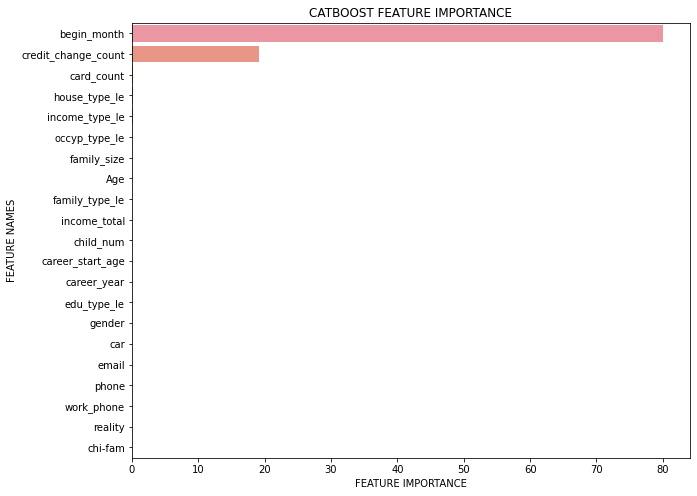

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df_ = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df_.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df_['feature_importance'], y=fi_df_['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(model.get_feature_importance(),X.columns,'CATBOOST')

In [ ]:
# 디폴트 하이퍼파라미터
model2 = cb.CatBoostClassifier(loss_function='MultiClass', eval_metric='Accuracy')
model2.fit(X_train, y_train,
           use_best_model=True, early_stopping_rounds=100, verbose=100)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.0871
0:	learn: 0.7232455	total: 5.03ms	remaining: 5.03s
100:	learn: 0.7392297	total: 523ms	remaining: 4.65s
200:	learn: 0.7544527	total: 1.05s	remaining: 4.19s
300:	learn: 0.7728726	total: 1.59s	remaining: 3.7s
400:	learn: 0.7876389	total: 2.11s	remaining: 3.15s
500:	learn: 0.8039275	total: 2.63s	remaining: 2.62s
600:	learn: 0.8193028	total: 3.16s	remaining: 2.1s
700:	learn: 0.8340691	total: 3.69s	remaining: 1.57s
800:	learn: 0.8520323	total: 4.23s	remaining: 1.05s
900:	learn: 0.8626884	total: 4.79s	remaining: 527ms
999:	learn: 0.8774547	total: 5.35s	remaining: 0us


In [ ]:
from sklearn.metrics import classification_report

pred = model2.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.27      0.06      0.09       307
         1.0       0.62      0.53      0.57       572
         2.0       0.74      0.92      0.82      1311

    accuracy                           0.70      2190
   macro avg       0.54      0.50      0.49      2190
weighted avg       0.64      0.70      0.65      2190



In [ ]:
model2.score(X_test, y_test)

0.6972602739726027

## LGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm_wrapper = LGBMClassifier(n_estimators=400, random_state=0)

In [ ]:
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, 
                 eval_metric="multi_logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's multi_logloss: 0.90263	valid_0's multi_logloss: 0.90263
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 0.877049	valid_0's multi_logloss: 0.877049
[3]	valid_0's multi_logloss: 0.856324	valid_0's multi_logloss: 0.856324
[4]	valid_0's multi_logloss: 0.839768	valid_0's multi_logloss: 0.839768
[5]	valid_0's multi_logloss: 0.82489	valid_0's multi_logloss: 0.82489
[6]	valid_0's multi_logloss: 0.812986	valid_0's multi_logloss: 0.812986
[7]	valid_0's multi_logloss: 0.802928	valid_0's multi_logloss: 0.802928
[8]	valid_0's multi_logloss: 0.794503	valid_0's multi_logloss: 0.794503
[9]	valid_0's multi_logloss: 0.787167	valid_0's multi_logloss: 0.787167
[10]	valid_0's multi_logloss: 0.78085	valid_0's multi_logloss: 0.78085
[11]	valid_0's multi_logloss: 0.775319	valid_0's multi_logloss: 0.775319
[12]	valid_0's multi_logloss: 0.77069	valid_0's multi_logloss: 0.77069
[13]	valid_0's multi_logloss: 0.766406	valid_0's multi_logloss: 0.766406
[14]	

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.09      0.00      0.01       307
         1.0       0.71      0.49      0.58       572
         2.0       0.71      0.97      0.82      1311

    accuracy                           0.71      2190
   macro avg       0.51      0.49      0.47      2190
weighted avg       0.63      0.71      0.65      2190



In [ ]:
# LightGbm Classifier 모델 정확도
lgbm_wrapper.score(X_test, y_test)

0.7109589041095891

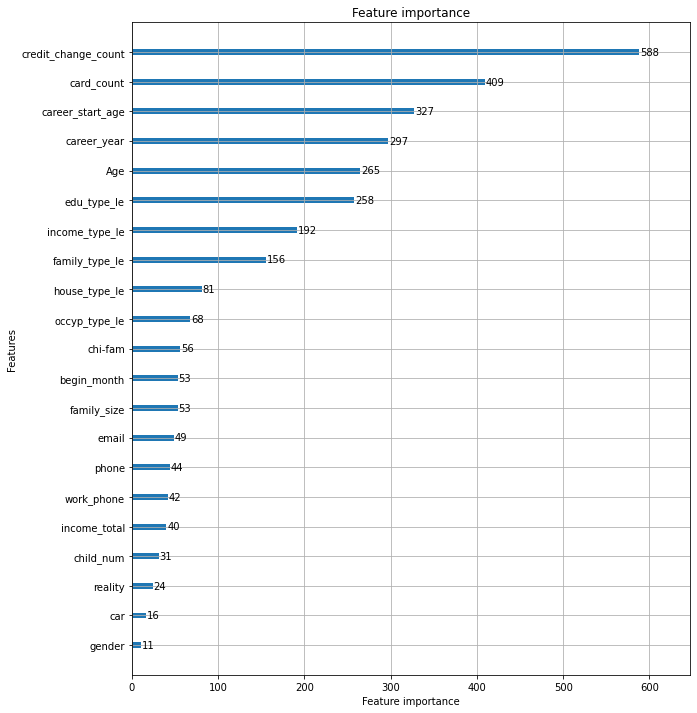

In [ ]:

from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax).set_yticklabels(X.columns)
plt.show()